In [ ]:
#Imports
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose, STL
from scipy.fft import fft
np.random.seed(0)  # for reproducibility

## Exercise 1


### Part 1

- Consider as the seasonal component the periodic signal with period 12
```python
time = np.arange(144)
seasonal_12 = 20 + np.sin(2*np.pi*time/12)*20
```
- Use `seasonal_12` and the `trend` and `residual` components below to define and plot the additive and the multiplicative models
```python
trend = time * 2.65 + 100
residuals = np.random.normal(loc=0.0, scale=3, size=len(time))
```
--------------------------------------------------

The additive model is built by adding together trend, seasonal, and residual components.

The multiplicative one is built by product of the same variables.

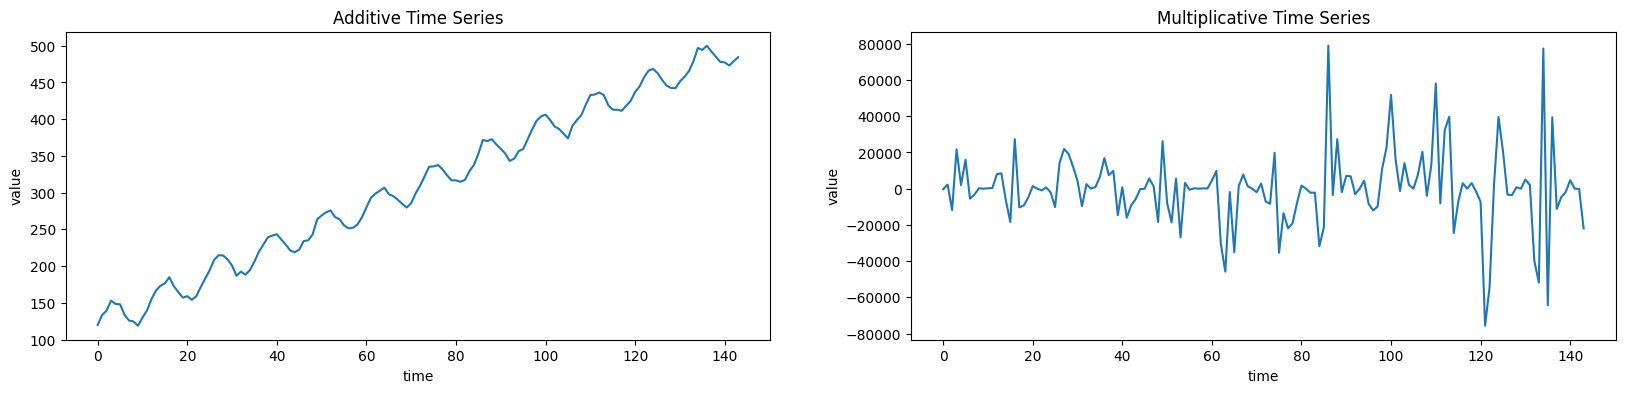

In [30]:


time = np.arange(144)
seasonal_12 = 20 + np.sin(2*np.pi*time/12)*20
trend = time * 2.65 + 100
residuals = np.random.normal(loc=0.0, scale=3, size=len(time))

additive_model = trend + seasonal_12 + residuals
multiplicative_model = trend * seasonal_12 * residuals

fig, ax = plt.subplots(1, 2, figsize=(20, 4))
ax[0].plot(time, additive_model, 'tab:blue')
ax[0].set_xlabel("time")
ax[0].set_ylabel("value")
ax[0].set_title("Additive Time Series")
plt.grid();

ax[1].plot(time, multiplicative_model, 'tab:blue')
ax[1].set_xlabel("time")
ax[1].set_ylabel("value")
ax[1].set_title("Multiplicative Time Series")
plt.grid();

### Part 2

- Perform the seasonal decomposition with `seasonal_decompose` and `STL` on the new signals and compare the results with the ones obtained in class, where we used an approximate period.
-----------------

In [48]:
# Utility function to make the plots
def seas_decomp_plots(original, decomposition):
    _, axes = plt.subplots(4, 1, sharex=True, sharey=False, figsize=(10, 8))
    axes[0].plot(original, label='Original')
    axes[0].legend(loc='upper left')
    axes[1].plot(decomposition.trend, label='Trend')
    axes[1].legend(loc='upper left')
    axes[2].plot(decomposition.seasonal, label='Seasonality')
    axes[2].legend(loc='upper left')
    axes[3].plot(decomposition.resid, label='Residuals')
    axes[3].legend(loc='upper left')
    plt.show()

# Modified plot to reinsert negative trend
def modified_seas_decomp_plots(original, decomposition, trend_offset):
    _, axes = plt.subplots(4, 1, sharex=True, sharey=False, figsize=(10, 8))
    axes[0].plot(original, label='Original')
    axes[0].legend(loc='upper left')
    axes[1].plot(decomposition.trend - abs(trend_offset) - 1, label='Trend')
    axes[1].legend(loc='upper left')
    axes[2].plot(decomposition.seasonal, label='Seasonality')
    axes[2].legend(loc='upper left')
    axes[3].plot(decomposition.resid, label='Residuals')
    axes[3].legend(loc='upper left')
    plt.show()

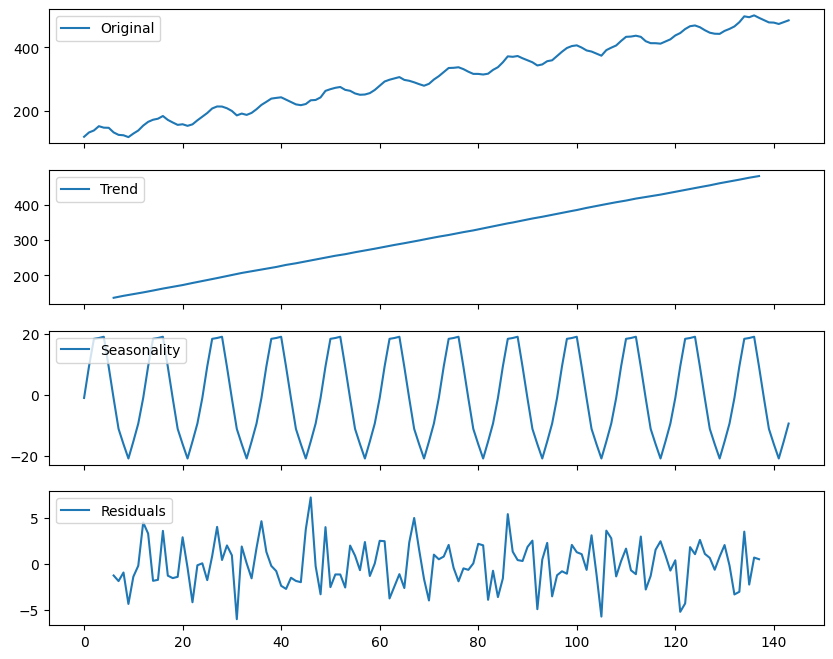

In [49]:

additive_decomposition = seasonal_decompose(x=additive_model, model='additive', period=12)
seas_decomp_plots(additive_model, additive_decomposition)

- With respect to the model used in class, In this case the seasonal_decompose was able to extract almost all the seasonality from theadditive signal. This is shown in the residual component, who has almost no seasonality left. This sugest that a seasonality period of 12 is correct in this case.

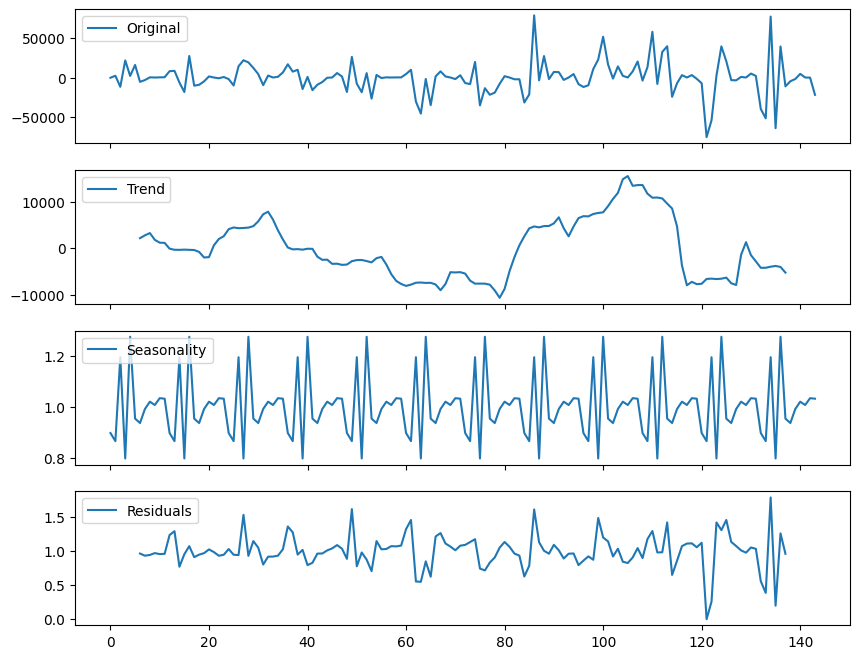

In [50]:
# Remove negative numbers by shifting up the time series
positive_multiplicative_model = multiplicative_model + abs(np.min(multiplicative_model)) + 1
multiplicative_decomposition = seasonal_decompose(x=positive_multiplicative_model, model='multiplicative', period=12)

# Add back the negative components to the trend only.
modified_seas_decomp_plots(multiplicative_model, multiplicative_decomposition, np.min(multiplicative_model))


First off, in this model we added also the residual therm that was not added in the class example. This perturbate a lot the prediction
- The trend is not identified correctly. It is not constant, with an oscillating amplitude.
- the resudual look correctly predicted, its envelope does increase in time and does not show particular signs of seasonality or trend.

Let's now try to create a multiplicative model without the residuals like in the class example, and compare the two.

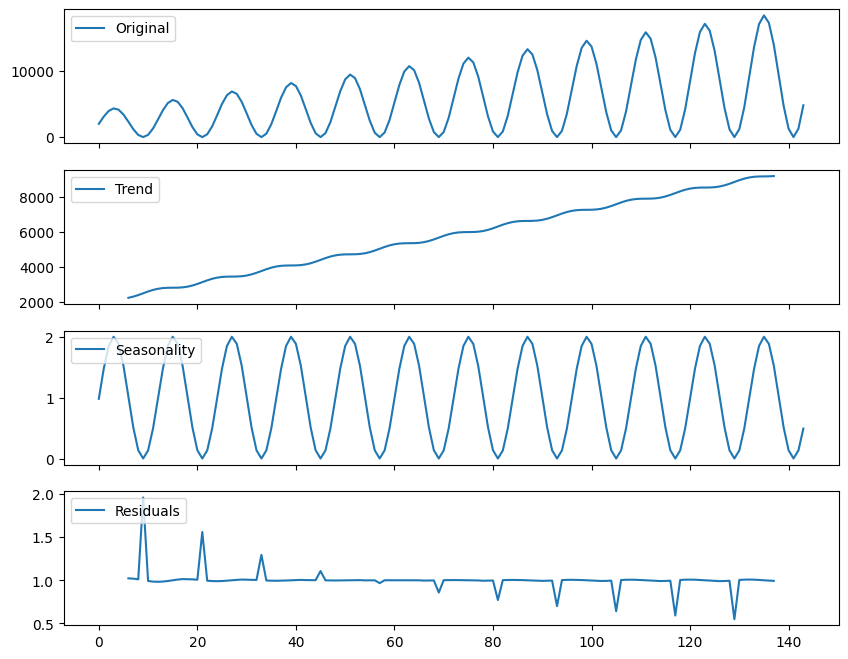

In [51]:
# Create multiplicative model with no residuals
multiplicative_model_no_res = trend * seasonal_12

# Remove negative numbers by shifting up the time series
positive_multiplicative_model_no_res = multiplicative_model_no_res + abs(np.min(multiplicative_model_no_res)) + 1
multiplicative_decomposition_no_res = seasonal_decompose(x=positive_multiplicative_model_no_res, model='multiplicative', period=12)

# Add back the negative components to the trend only.
modified_seas_decomp_plots(multiplicative_model_no_res, multiplicative_decomposition_no_res, np.min(multiplicative_model_no_res))


In this case we can confirm the result obtained for the additive model.

- Trend and seasonlaity were almost correctly identified.
- Since there is no residual in this case, we expect the residual plot to be a vector of zeros.
- There is still some small seasonality component left in the residual and trend, but its negligible. 
- This confirms that the seasonality period is indeed 12 samples.

## Exercise 2
Load the two different time series as follows.
```python
import statsmodels.api as sm
ts_A = sm.datasets.get_rdataset("AirPassengers", "datasets").data["value"].values
print(len(ts_A))
ts_B = sm.datasets.get_rdataset("co2", "datasets").data["value"].values
print(len(ts_B))
```
- Plot the two time series.
- Determine if the time series looks additive or multiplicative models.
- Determine the main period of the seasonal component in the two time series.

In [ ]:
ts_A = sm.datasets.get_rdataset("AirPassengers", "datasets").data["value"].values
print(len(ts_A))
ts_B = sm.datasets.get_rdataset("co2", "datasets").data["value"].values
print(len(ts_B))

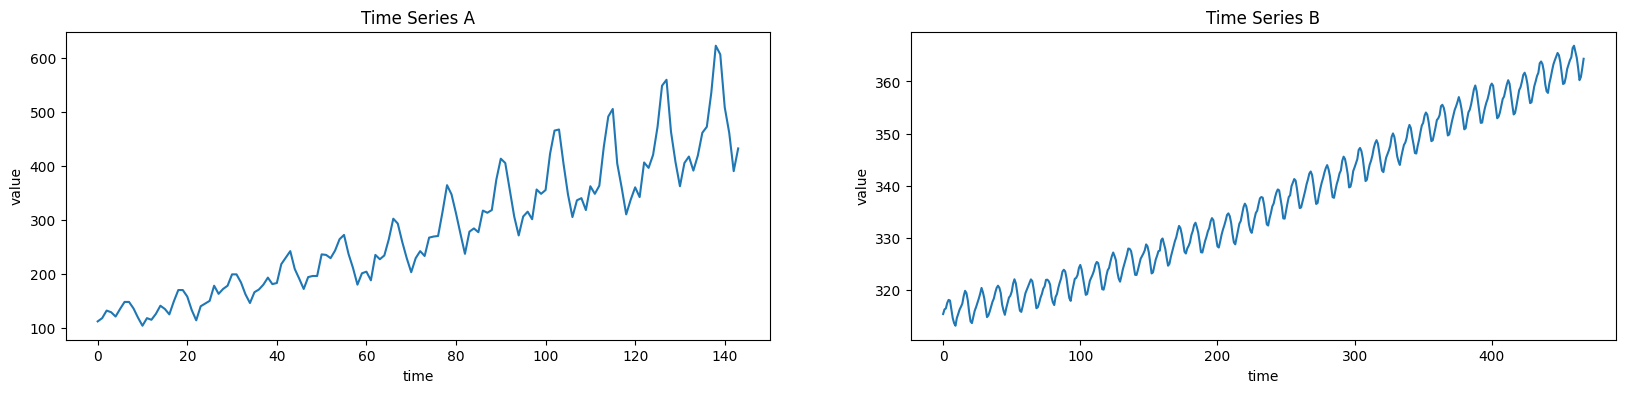

In [58]:
fig, ax = plt.subplots(1, 2, figsize=(20, 4))
ax[0].plot(ts_A, 'tab:blue')
ax[0].set_xlabel("time")
ax[0].set_ylabel("value")
ax[0].set_title("Time Series A")
plt.grid();

ax[1].plot(ts_B, 'tab:blue')
ax[1].set_xlabel("time")
ax[1].set_ylabel("value")
ax[1].set_title("Time Series B")
plt.grid();

- From a visual inspection, ts_A resambles a multiplicative time series: Its seasonal component amplitude increase with time. 
- Although, the residual of ts_A could be additive, since the random component don't increase with time (see how the noise component is is prevalent in the first samples but less visible in the last samples, where the seasonal component is heavly scaled and has a bigger impact on the total series).
This could make the time sieries A a pseudoadditive model, where the seasonality is multiplicative while the residual is additive.
- ts_B on the other hand is probably additive, since its seasonal component remains constant in amplitude.

To find the exact period of the seasonality, let's use FFT.

In [59]:
def fft_analysis(signal):
    
    # Linear detrending
    slope, intercept = np.polyfit(np.arange(len(signal)), signal, 1)
    trend = np.arange(len(signal)) * slope + intercept 
    detrended = signal - trend 
    
    fft_values = fft(detrended)
    frequencies = np.fft.fftfreq(len(fft_values))

    # Remove negative frequencies and sort
    positive_frequencies = frequencies[frequencies > 0]
    magnitudes = np.abs(fft_values)[frequencies > 0]

    # Identify dominant frequency
    dominant_frequency = positive_frequencies[np.argmax(magnitudes)]
    print(f"Dominant Frequency: {dominant_frequency:.3f}")

    # Convert frequency to period (e.g., days, weeks, months, etc.)
    dominant_period = 1 / dominant_frequency
    print(f"Dominant Period: {dominant_period:.2f} time units")
    
    return dominant_period, positive_frequencies, magnitudes

Dominant Frequency: 0.083
Dominant Period: 12.00 time units


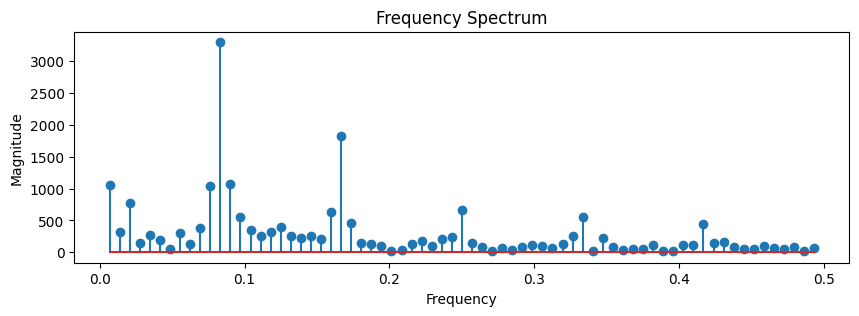

Dominant Frequency: 0.083
Dominant Period: 12.00 time units


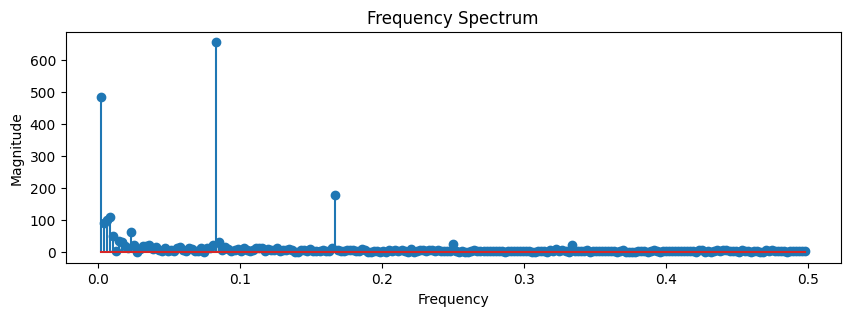

In [73]:

period, freqs, magnitudes = fft_analysis(ts_A)
# Plotting the spectrum
plt.figure(figsize=(10, 3))
plt.stem(freqs, magnitudes)
plt.title('Frequency Spectrum')
plt.xlabel('Frequency')
plt.ylabel('Magnitude')
plt.show()

period, freqs, magnitudes = fft_analysis(ts_B)
# Plotting the spectrum
plt.figure(figsize=(10, 3))
plt.stem(freqs, magnitudes)
plt.title('Frequency Spectrum')
plt.xlabel('Frequency')
plt.ylabel('Magnitude')
plt.show()

The seasonal component period is 12 in both the time series. 
- The FFT shows clear equally spaced peaks with a fixed distance, which hints that the seasonal period is indeed 12.
- The multiple spikes could be because the seasonal component in our signal is not a pure sinusoid, which has only 1 armonic component.

### Exercise 3
- Decompose `ts_A` and `ts_B` using `seasonal_decompose` and `STL`.
- Comment on the results you obtain.

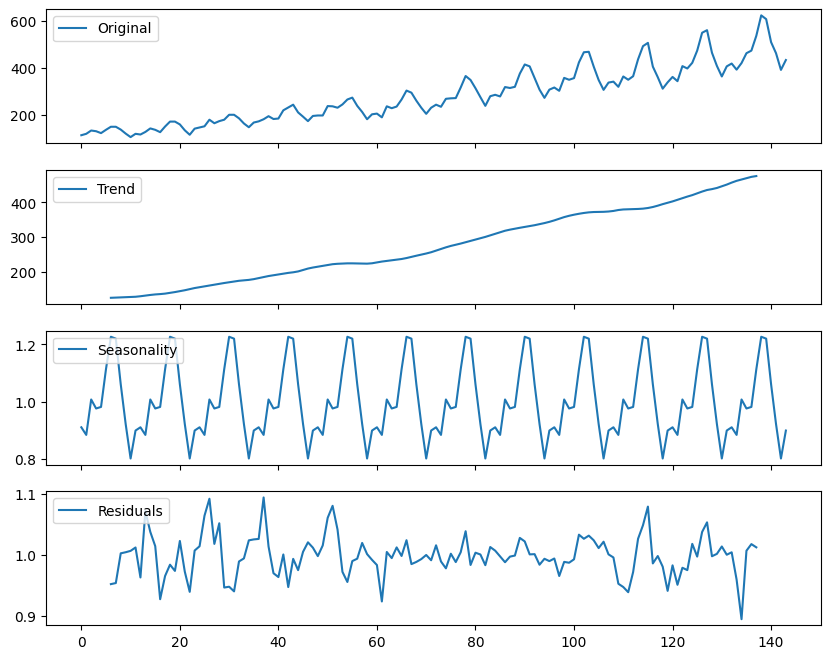

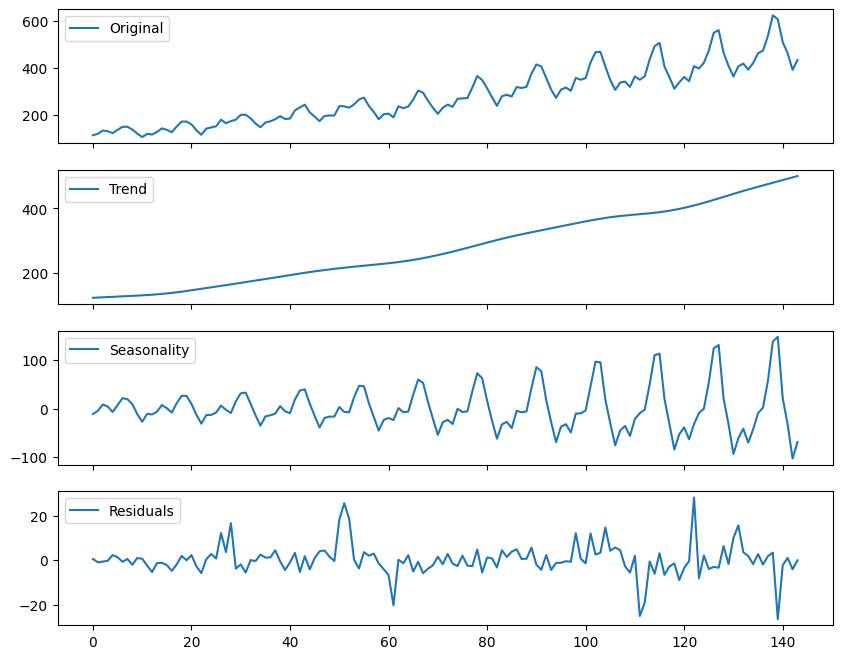

In [80]:
ts_A_seas_decompose = seasonal_decompose(x=ts_A, model='multiplicative', period=12)
ts_A_seas_STL = STL(endog=ts_A, period=12, robust=True).fit()

seas_decomp_plots(ts_A, ts_A_seas_decompose)
seas_decomp_plots(ts_A, ts_A_seas_STL)


seasonal_decompose works better than STL for time series A. 
- In the STL case, both seasonality and residuals grow over time. This means that the multiplicative model has not been recognized correctly.
- For seasonal_decompose method, the seasonality mantains a stable amplitude, aldough the residual could still have some sonality left.

Since the signal is a simple multiplicative time series, using a simpler model such as seasonal_decompose works better.

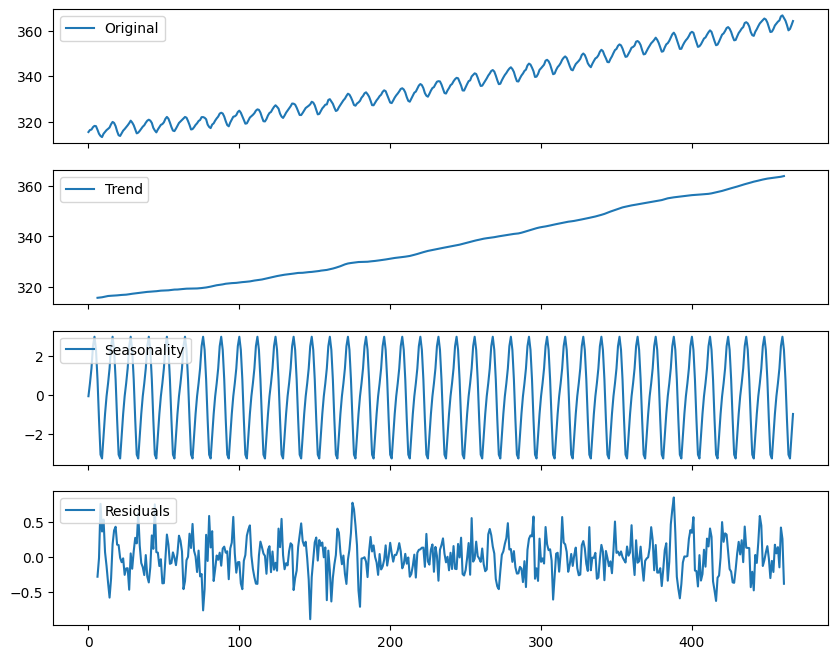

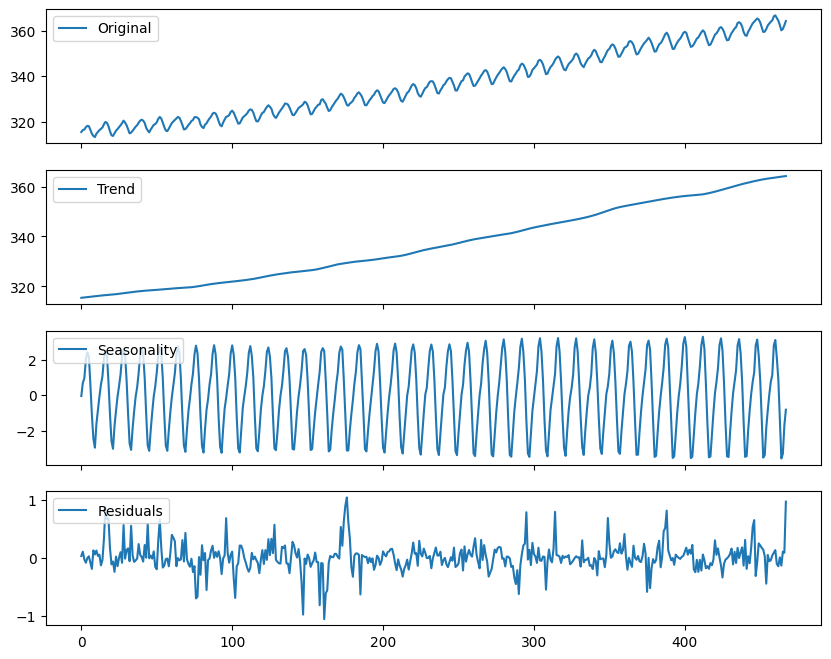

In [82]:
ts_B_seas_decompose = seasonal_decompose(x=ts_B, model='additive', period=12)
ts_B_seas_STL = STL(endog=ts_B, period=12, robust=True).fit()

seas_decomp_plots(ts_B, ts_B_seas_decompose)
seas_decomp_plots(ts_B, ts_B_seas_STL)

In this case, both decomposition methods work well, they provide almost exact results.